In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DSCI-550-Group-Project/Data/cleaned_data.csv")

In [4]:
df.head(10)

,Severity,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Airport_Code,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,year,month,Weekday,Hour
0,3,40.108910,-83.092860,Outerbelt E,R,Dublin,Franklin,OH,43017,KOSU,...,0,0,1,1,1,1,2016,2,0,0
1,2,39.865420,-84.062800,I-70 E,R,Dayton,Montgomery,OH,45424,KFFO,...,0,0,1,1,1,1,2016,2,0,5
2,2,39.102660,-84.524680,I-75 S,R,Cincinnati,Hamilton,OH,45203,KLUK,...,0,0,1,1,1,0,2016,2,0,6
3,2,41.062130,-81.537840,I-77 N,R,Akron,Summit,OH,44311,KAKR,...,0,0,1,1,0,0,2016,2,0,6
4,3,39.172393,-84.492792,I-75 S,R,Cincinnati,Hamilton,OH,45217,KLUK,...,0,0,0,0,0,0,2016,2,0,7
5,2,39.063240,-84.032430,State Route 32,R,Williamsburg,Clermont,OH,45176,KI69,...,0,1,0,0,0,0,2016,2,0,8
6,2,39.775650,-84.186030,I-75 S,R,Dayton,Montgomery,OH,45404,KFFO,...,0,0,0,0,0,0,2016,2,0,8
7,2,41.375310,-81.820170,I-71 S,R,Cleveland,Cuyahoga,OH,44130,KCLE,...,0,0,0,0,0,0,2016,2,0,11
8,2,40.702247,-84.075887,E Hanthorn Rd,R,Lima,Allen,OH,45806,KAOH,...,0,0,0,0,0,0,2016,2,0,14
9,2,40.109310,-82.968490,Outerbelt W,R,Westerville,Franklin,OH,43081,KCMH,...,0,0,0,0,0,0,2016,2,0,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666559 entries, 0 to 2666558
Data columns (total 39 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Severity                     int64  
 1   Start_Lat                    float64
 2   Start_Lng                    float64
 3   Street                       object 
 4   Side                         object 
 5   City                         object 
 6   County                       object 
 7   State                        object 
 8   Zipcode                      object 
 9   Airport_Code                 object 
 10  Temperature(F)               float64
 11  Wind_Chill(F)                float64
 12  Humidity(%)                  float64
 13  Pressure(in)                 float64
 14  Visibility(mi)               float64
 15  Wind_Direction               object 
 16  Wind_Speed(mph)              float64
 17  Precipitation(in)            float64
 18  Weather_Condition            object 
 19  

In [6]:
# Dropping Irrelevant Columns for the Model Training
df.drop(columns=['Street', 'City', 'County','State','Zipcode','Airport_Code'], inplace=True)
# We should also drop year for our model
df.drop(columns=['year'], inplace=True)


## Feature Engineering

In [7]:
categorical_cols = df.select_dtypes(include=['object','bool','category']).columns

for x in range(0,len(categorical_cols)):
  col = categorical_cols[x]
  print(col + ":" + str(df[col].value_counts()))


Side:R    2219525
L     447034
Name: Side, dtype: int64
Wind_Direction:Calm        548625
NW          385220
SW          373614
SE          315264
NE          249759
S           196802
W           194803
N           148441
E           135554
Variable    118477
Name: Wind_Direction, dtype: int64
Weather_Condition:Clear           1267159
Cloudy          1027611
Rain             176195
Fog               73587
Snow              54296
Windy             30719
Thunderstorm      29839
Smoke              6796
Sand                202
Hail                147
Tornado               8
Name: Weather_Condition, dtype: int64


### One Hot Encoding for Side as only two values R and L: Dummy Variable

In [8]:
df = pd.get_dummies(df, columns = ['Side'])
df.drop(columns=['Side_R'], inplace=True)
df.head(5)

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,month,Weekday,Hour,Side_L
0,3,40.108910,-83.092860,42.1,36.1,58.0,29.76,10.0,SW,10.4,...,0,0,1,1,1,1,2,0,0,0
1,2,39.865420,-84.062800,36.9,63.0,91.0,29.68,10.0,Calm,7.0,...,0,0,1,1,1,1,2,0,5,0
2,2,39.102660,-84.524680,36.0,63.0,97.0,29.70,10.0,Calm,7.0,...,0,0,1,1,1,0,2,0,6,0
3,2,41.062130,-81.537840,39.0,63.0,55.0,29.65,10.0,Calm,7.0,...,0,0,1,1,0,0,2,0,6,0
4,3,39.172393,-84.492792,37.0,29.8,93.0,29.69,10.0,SW,10.4,...,0,0,0,0,0,0,2,0,7,0


In [9]:
# DISTRIBUTION
severity_counts = df["Severity"].value_counts()
severity_counts

2    2359206
3     153091
4     129213
1      25049
Name: Severity, dtype: int64

### Sampling

Sample Statistics = Population Statistics
Peform Random UnderSampler - Making Dataset Balanced

In [10]:
# TAKING A SMALLER SUBSET
df2 = df.sample(frac=0.1, random_state=42)
df2.dropna(inplace=True)

### Splitting

In [11]:
X = df2.drop('Severity', axis=1)
y = df2['Severity']

# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Encoding
After Splitting the dataset to avoid Data Leakage
As Label Encoding for Ordinal but Higher Number of Categories

In [12]:
categorical_cols = df.select_dtypes(include=['object','bool','category']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

### Checking The Distribution Of Target Variable

In [13]:
from collections import Counter
print(Counter(y_train).keys())
 # equals to list(set(words))
print(Counter(y_train).values())

dict_keys([2, 3, 4, 1])
dict_values([165165, 10705, 9049, 1740])


Essentially applying SMOTE makes the job easier for the model as one reduces the instances losing some crucial data while the other generates artificial instances which tend to have the same properties as each other, so it's easier for the model to capture their patterns. However these instances are rarely a good representative sample for the minority class, so there's a higher risk that the model overfits. So we preferred the imbalance dataset.

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

# transform the dataset = {1:21327, 2:21327, 3:21327, 4:21327}
#count_class= 21327

#oversample = SMOTE(sampling_strategy=strategy)
#X_train, y_train = oversample.fit_resample(X_train, y_train)

#SMOTE will be applied to increases the number of the samples of class 0 to 300 and Tomek will be used to remove noisy samples.
#If you really want to have an under-sampling you could pipeline 2 samplers:

#pipe = make_pipeline(
#    RandomUnderSampler(sampling_strategy={2: count_class}),
#    RandomOverSampler(sampling_strategy={1: count_class, 3: count_class, 4: count_class,})
#    )
#X_train, y_train = pipe.fit_resample(X_train, y_train)

In [15]:
from collections import Counter
print(Counter(y_train).keys())
 # equals to list(set(words))
print(Counter(y_train).values())

dict_keys([2, 3, 4, 1])
dict_values([165165, 10705, 9049, 1740])


## Model
*   Models that dont require Normalization - RFC, DT, SVM
*   Models that require Normalization - KNN, Logistic Regression

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[  207   540     7     0]
 [   25 70515   191   124]
 [    4  3868   604    47]
 [    8  3497    72   288]]
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.27      0.41       754
           2       0.90      1.00      0.94     70855
           3       0.69      0.13      0.22      4523
           4       0.63      0.07      0.13      3865

    accuracy                           0.90     79997
   macro avg       0.77      0.37      0.43     79997
weighted avg       0.87      0.90      0.86     79997



Note :
RandomForestClassifier class in scikit-learn supports cost-sensitive learning via the “class_weight” argument. By default, the random forest class assigns equal weight to each class. We can evaluate the classification accuracy of the default random forest class weighting on the dataset

### Decision Trees

In [18]:
from sklearn.tree import export_graphviz


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[  275   377    67    35]
 [  472 64575  3019  2789]
 [   52  2648  1334   489]
 [   36  2448   505   876]]
Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.36      0.35       754
           2       0.92      0.91      0.92     70855
           3       0.27      0.29      0.28      4523
           4       0.21      0.23      0.22      3865

    accuracy                           0.84     79997
   macro avg       0.43      0.45      0.44     79997
weighted avg       0.85      0.84      0.84     79997



In [20]:
#tree.plot_tree(clf);

### XGBoost

In [21]:

import xgboost as xgb
from tqdm.notebook import tqdm_notebook as tqdm

X = df2.drop('Severity', axis=1)
y = df2['Severity'] - 1  ## NEW: xgboost requires [0,1,2,3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

label_encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Convert to format for xgBoost
X_train_npy = X_train.to_numpy()
X_test_npy = X_test.to_numpy()
y_train_npy = y_train.to_numpy()
y_test_npy = y_test.to_numpy()
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', random_state=11)

xgb_classifier.fit(X_train_npy, y_train_npy)

y_pred = xgb_classifier.predict(X_test_npy)

class_report = classification_report(y_test_npy, y_pred, labels=range(4),
                                             target_names=[f'{"Severity"} {i+1}' for i in range(4)])
print(class_report)

              precision    recall  f1-score   support

  Severity 1       0.79      0.30      0.44       754
  Severity 2       0.91      0.99      0.95     70855
  Severity 3       0.62      0.18      0.28      4523
  Severity 4       0.60      0.15      0.24      3865

    accuracy                           0.90     79997
   macro avg       0.73      0.41      0.48     79997
weighted avg       0.87      0.90      0.87     79997



['Wind_Chill(F)', 'month', 'Nautical_Twilight_Night', 'Side_L', 'Start_Lng', 'Traffic_Signal', 'Start_Lat', 'Astronomical_Twilight_Night', 'Junction', 'Pressure(in)', 'Bump', 'Wind_Speed(mph)', 'Hour', 'Civil_Twilight_Night', 'Temperature(F)', 'Sunrise_Sunset_Night', 'Weekday', 'Crossing', 'Give_Way', 'Humidity(%)', 'Station', 'Weather_Condition', 'Stop', 'Wind_Direction', 'Visibility(mi)', 'Amenity', 'Precipitation(in)', 'Railway', 'Traffic_Calming', 'No_Exit', 'Roundabout']


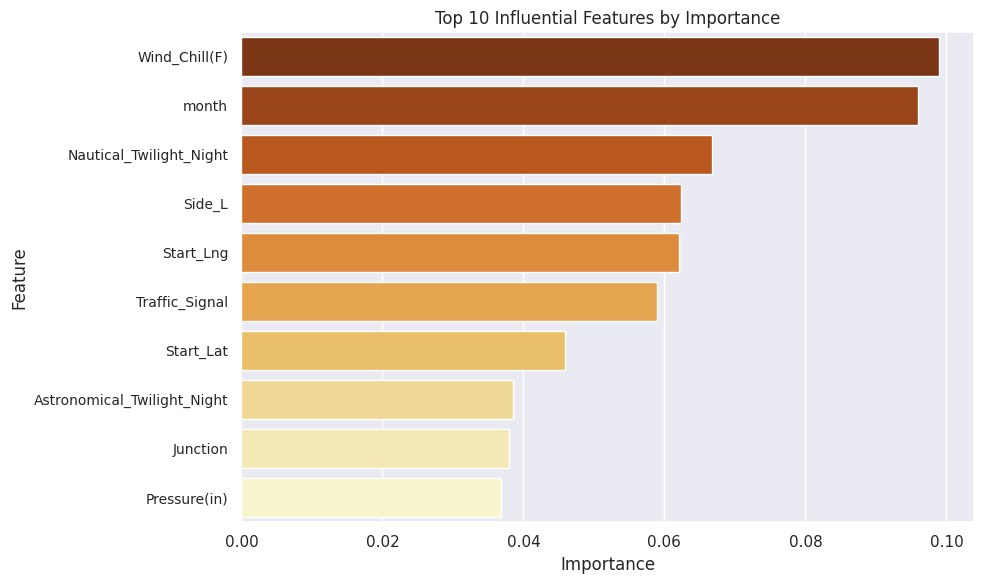

In [22]:
feature_importances = xgb_classifier.feature_importances_
sns.set(style="darkgrid", palette="YlOrBr", context="notebook")
column_names = X_train.columns

feature_importance_df = pd.DataFrame({"Feature": column_names, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(list(feature_importance_df["Feature"]))

plt.figure(figsize=(10, 6))

"""
Currently showing all the features.
Note: We should decide whether to adjust to include just top 10, top 10 excluding year, etc.
We may think about excluding "Year" after looking at the breakdown in Sujith
"""
sns.barplot(data=feature_importance_df.head(10), x="Importance", y="Feature", palette="YlOrBr_r")
plt.title("Top 10 Influential Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tick_params(axis='y', labelsize='small')

plt.tight_layout()
plt.show()

### Normalization for the Models KNN & Logistic Regression,
### For SVM it is not reuired but recommended as improves speed and performance.

Standard Scaler/ MinMax Scaler

Due to outliers,,, everything is not ...

In [23]:
#standardizing or normalizing - scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# We are only transforming our input features
scaled_feat=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_test_feat = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)


## SVM

In [ ]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(scaled_feat,y_train)

y_pred = svm_classifier.predict(scaled_test_feat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

### KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(scaled_feat,y_train)

y_pred = knn.predict(scaled_test_feat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

"""
Adjust/tune here, adjust scoring metric and cv folds in GridSearchCV call.
"""
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [5, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(f"Best Parameters: {best_params}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,
                              display_labels=range(1, 5))

disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)